# ENGR 1330 – Computational Thinking and Data Science

## Red Wine Quality Final Project - Background
In this project, a dataset related to red wine samples from the northwest region of Portugal will
be analyzed. The quality of a red wine that is determined via a sensory test is dependent on many different
physicochemical properties, namely, fixed acidity, volatile acidity, pH value, density, etc. A file named
‘winequality-red.csv’ contains information about different varieties of red wine and their quality that
depends on several physicochemical properties like the ones mentioned above. Specifically, in the dataset, there is a quality score (QS) ranging from 3 to 8 that is given to each variety of red wine depending on 11 different properties. For this project, consider that a good wine is one with a quality score of
QS ≥ 6 and a bad wine is one with a quality score of QS ≤ 5. The objective of this problem is to
classify whether the wine is good or bad depending on the 11 different properties that are in the dataset.

## Required Tasks:
(a) Literature review:
1) P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. Modeling wine preferences by data mining
from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. [Get
the research paper from Web of Science at TTU].

(b) Data acquisition:
1) Get the dataset required for this project from the following Kaggle website:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

(c) Exploratory data analysis
 1) Perform exploratory data analysis (getting information about the dataset, making plots, etc.)
 2) Modify the dataset as needed for performing the analysis

(d) Classification model
 1) Implement a classification algorithm from scratch as well as using the data science library to
classify good wines and bad wines
 2) Evaluate the model by computing the necessary evaluation metrics from scratch as well as using
the data science library


**Database Acquisition**
- Get the database from the zip file from BlackBoard or Kaggle website: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- Supply links to any additional databases discovered during the literature research

**Exploratory Data Analysis**
- Describe (in words) the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.

**Model Building**
- Build data model
- Assess data model quality
- Build the input data interface for using the model              
       
**Documentation**
- Training and Project management video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf.
- Final ipynb file (see deliverables below)

## Deliverables:

#### Part 1 Interim Report (due Dec 1):
A report that briefly describes the project.Use the Interim Report Template in BlackBoard.   
- Break down each task into manageable subtasks and describe how you intend to solve the subtasks and how you will test each task. (Perhaps make a simple Gantt Chart) or list of meeting times. 
- Address the responsibilities of each team member for tasks completed and tasks to be completed until the end of the semester. (Perhaps make explicit subtask assignments)  

#### Part 2 Final Report (due Dec 10):
- A well-documented JupyterLab (using a python kernel), use markdown cells and commenting for explanations and text. 
- A how-to video demonstrating performance and description of problems that you were not able to solve and also talk about project management such as who did what. Active participation of every single group member is mandatory in the presentation. 
- A final peer evaluation report, where each group member should rate the participation and contribution of the other members.

**Above items can reside in a single video; but structure the video into the two parts; use an obvious transition when moving from "how to ..." into the project management portion.**  Keep the total video length to less than 10 minutes; submit as an *unlisted* YouTube video, and just supply the link (someone on each team is likely to have a YouTube creator account).  Keep in mind a 10 minute video can approach 100MB file size before compression, so it won't upload to Blackboard and cannot be emailed.

Step 1: import libraries and CSV

In [1]:
#Importing the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
#Displaying the first 5 rows to ensure the .csv is correct.
df = pd.read_csv('redwinequality.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Step 2: Collecting vital information

In [2]:
#Collecting vital information such as number of rows, data types, means, percentiles, and other essential data.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

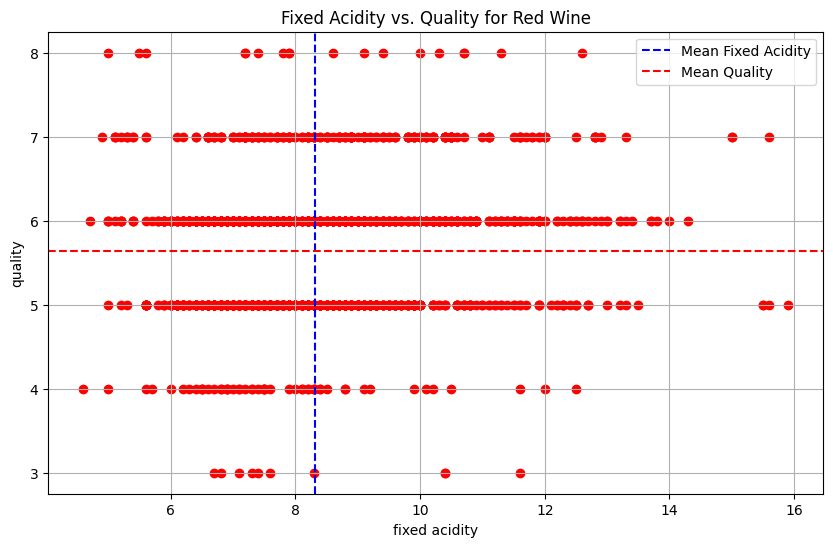

In [64]:
#Fixed Acidity vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["fixed acidity"], df["quality"], color="red")
plt.xlabel("fixed acidity")
plt.ylabel("quality")
plt.axvline(df["fixed acidity"].mean(), color="blue", linestyle="--", label="Mean Fixed Acidity")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Fixed Acidity vs. Quality for Red Wine")
plt.grid(True)
plt.show()

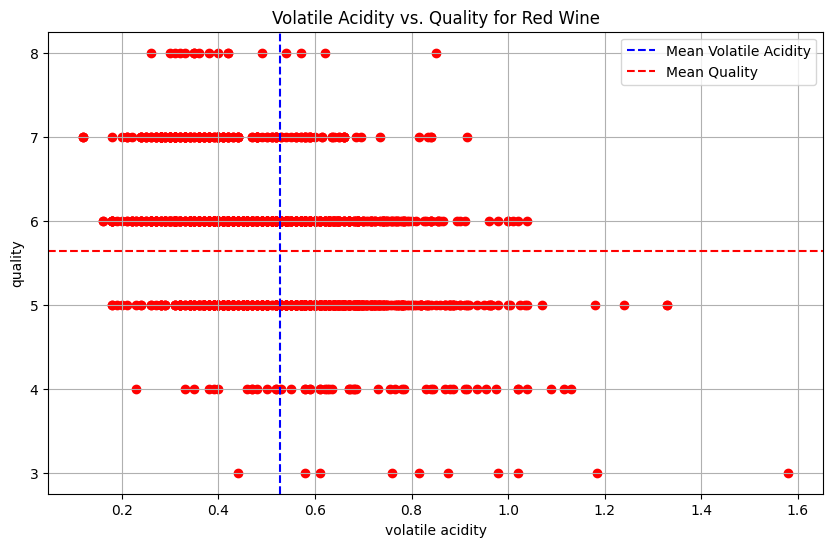

In [65]:
#Volatile Acidity vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["volatile acidity"], df["quality"], color="red")
plt.xlabel("volatile acidity")
plt.ylabel("quality")
plt.axvline(df["volatile acidity"].mean(), color="blue", linestyle="--", label="Mean Volatile Acidity")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Volatile Acidity vs. Quality for Red Wine")
plt.grid(True)
plt.show()

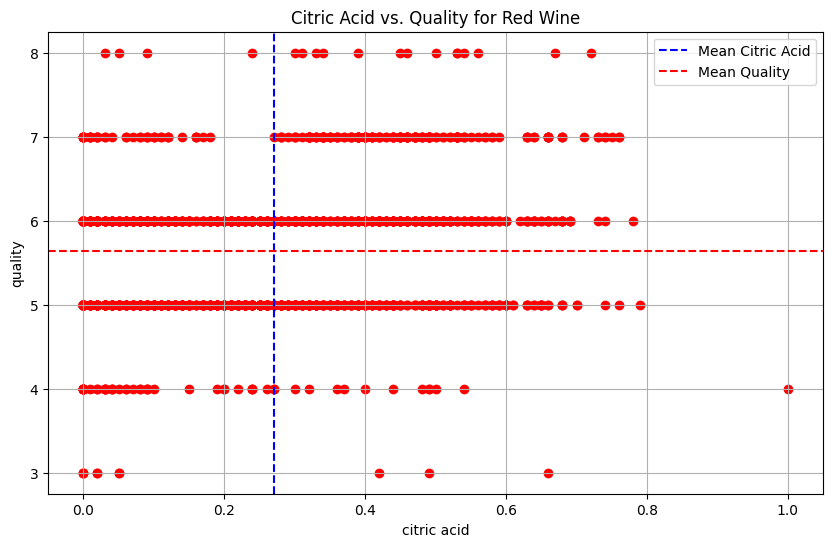

In [66]:
#Citric Acid vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["citric acid"], df["quality"], color="red")
plt.xlabel("citric acid")
plt.ylabel("quality")
plt.axvline(df["citric acid"].mean(), color="blue", linestyle="--", label="Mean Citric Acid")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Citric Acid vs. Quality for Red Wine")
plt.grid(True)
plt.show()

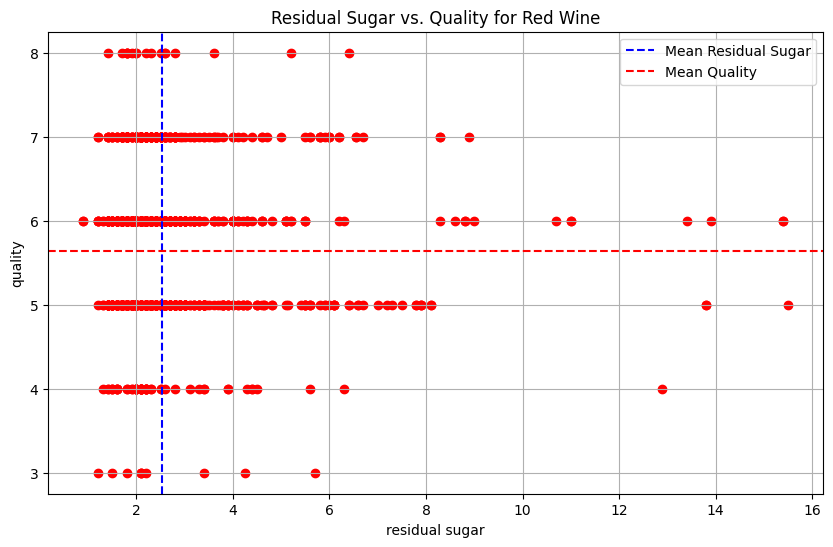

In [67]:
#Residual Sugar vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["residual sugar"], df["quality"], color="red")
plt.xlabel("residual sugar")
plt.ylabel("quality")
plt.axvline(df["residual sugar"].mean(), color="blue", linestyle="--", label="Mean Residual Sugar")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Residual Sugar vs. Quality for Red Wine")
plt.grid(True)
plt.show()

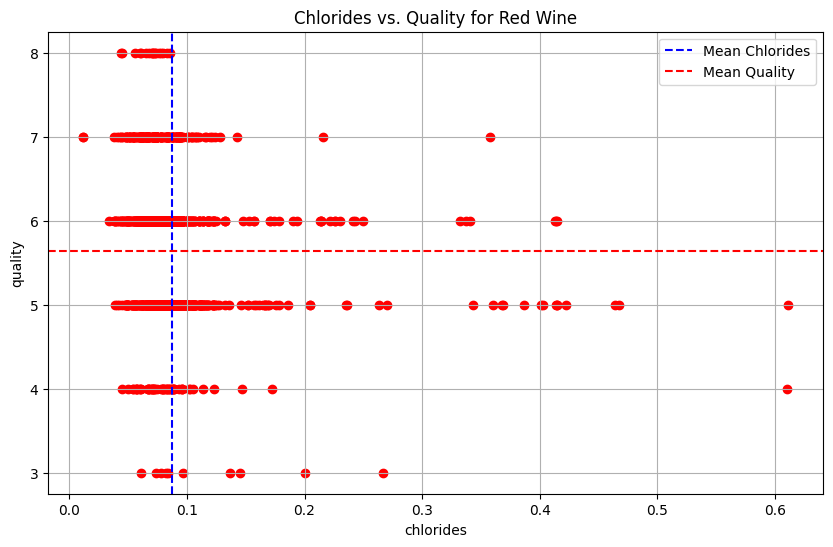

In [68]:
#Chlorides vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["chlorides"], df["quality"], color="red")
plt.xlabel("chlorides")
plt.ylabel("quality")
plt.axvline(df["chlorides"].mean(), color="blue", linestyle="--", label="Mean Chlorides")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Chlorides vs. Quality for Red Wine")
plt.grid(True)
plt.show()

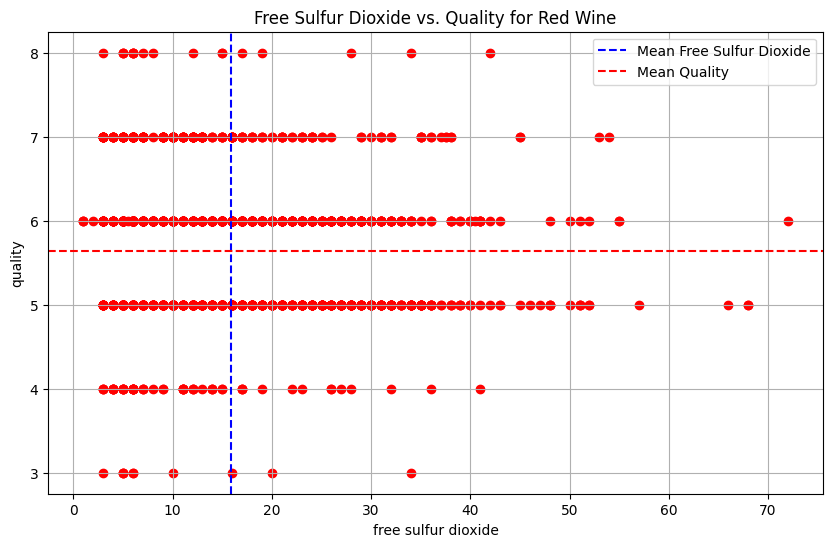

In [69]:
#Free Sulfur Dioxide vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["free sulfur dioxide"], df["quality"], color="red")
plt.xlabel("free sulfur dioxide")
plt.ylabel("quality")
plt.axvline(df["free sulfur dioxide"].mean(), color="blue", linestyle="--", label="Mean Free Sulfur Dioxide")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Free Sulfur Dioxide vs. Quality for Red Wine")
plt.grid(True)
plt.show()

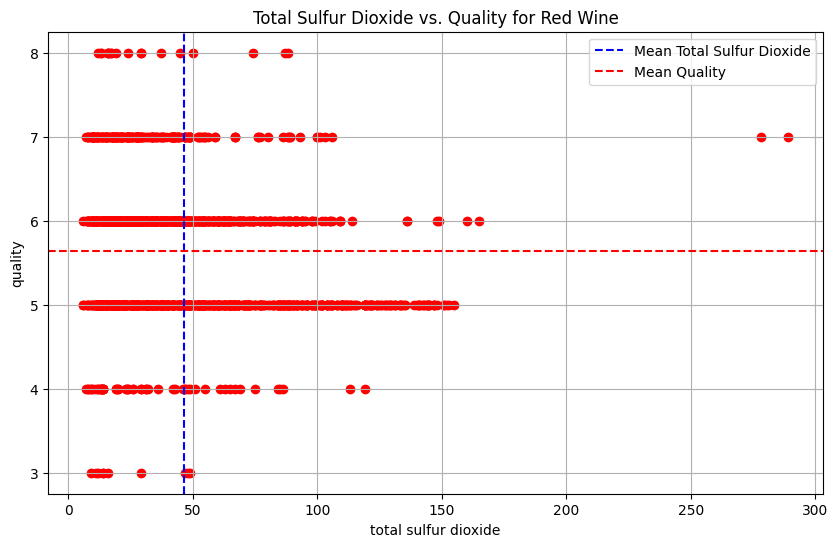

In [70]:
#Total Sulfur Dioxide vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["total sulfur dioxide"], df["quality"], color="red")
plt.xlabel("total sulfur dioxide")
plt.ylabel("quality")
plt.axvline(df["total sulfur dioxide"].mean(), color="blue", linestyle="--", label="Mean Total Sulfur Dioxide")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Total Sulfur Dioxide vs. Quality for Red Wine")
plt.grid(True)
plt.show()

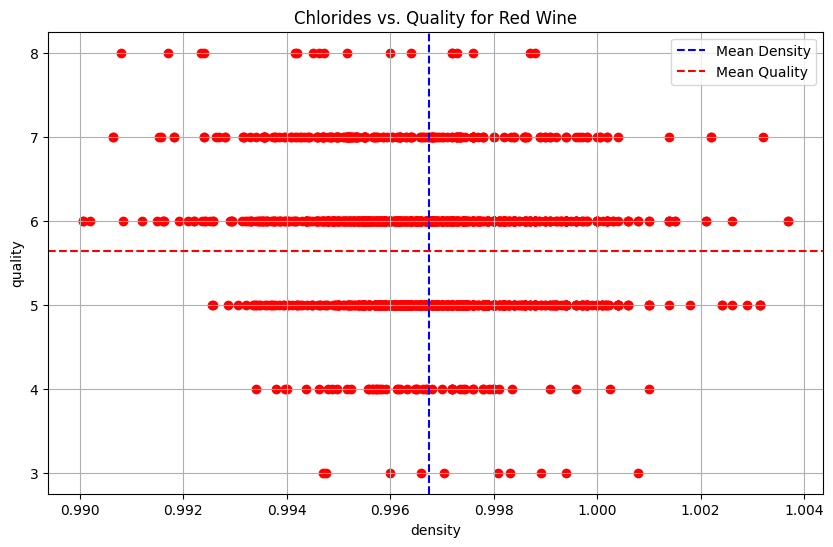

In [71]:
#Density vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["density"], df["quality"], color="red")
plt.xlabel("density")
plt.ylabel("quality")
plt.axvline(df["density"].mean(), color="blue", linestyle="--", label="Mean Density")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Chlorides vs. Quality for Red Wine")
plt.grid(True)
plt.show()

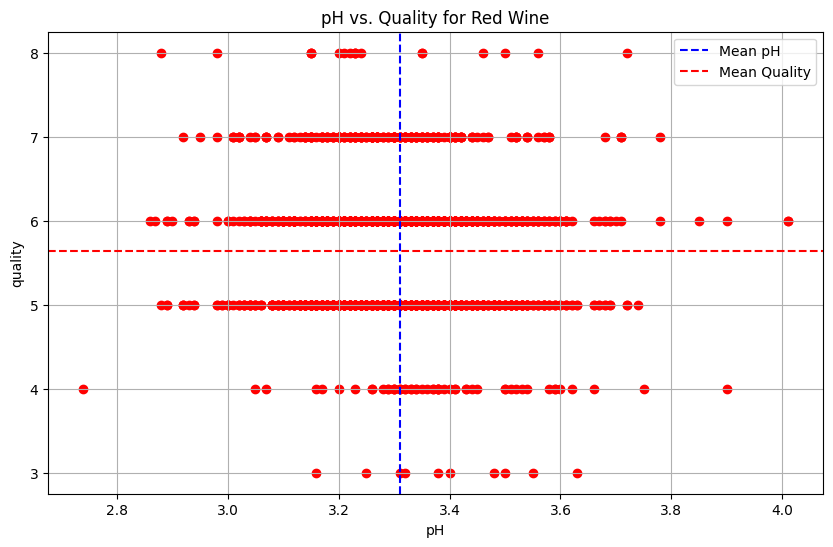

In [72]:
#pH vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["pH"], df["quality"], color="red")
plt.xlabel("pH")
plt.ylabel("quality")
plt.axvline(df["pH"].mean(), color="blue", linestyle="--", label="Mean pH")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("pH vs. Quality for Red Wine")
plt.grid(True)
plt.show()

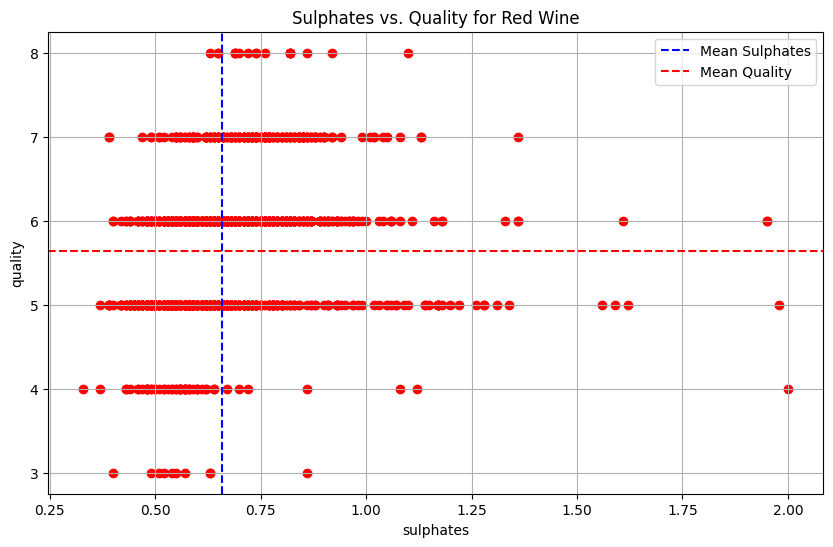

In [73]:
#Sulphates vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["sulphates"], df["quality"], color="red")
plt.xlabel("sulphates")
plt.ylabel("quality")
plt.axvline(df["sulphates"].mean(), color="blue", linestyle="--", label="Mean Sulphates")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Sulphates vs. Quality for Red Wine")
plt.grid(True)
plt.show()

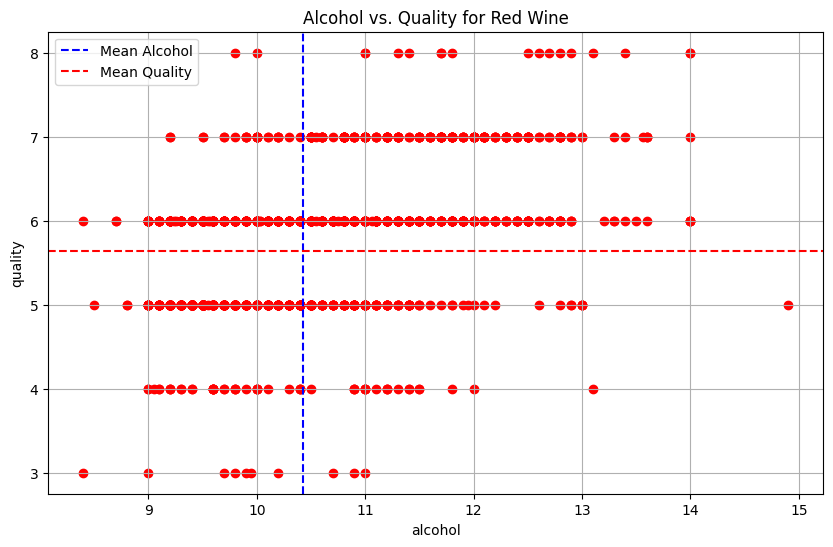

In [74]:
#Alcohol vs Quality Graph
plt.figure(figsize=(10, 6))
plt.scatter(df["alcohol"], df["quality"], color="red")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.axvline(df["alcohol"].mean(), color="blue", linestyle="--", label="Mean Alcohol")
plt.axhline(df["quality"].mean(), color="red", linestyle="--", label="Mean Quality")
plt.legend()
plt.title("Alcohol vs. Quality for Red Wine")
plt.grid(True)
plt.show()

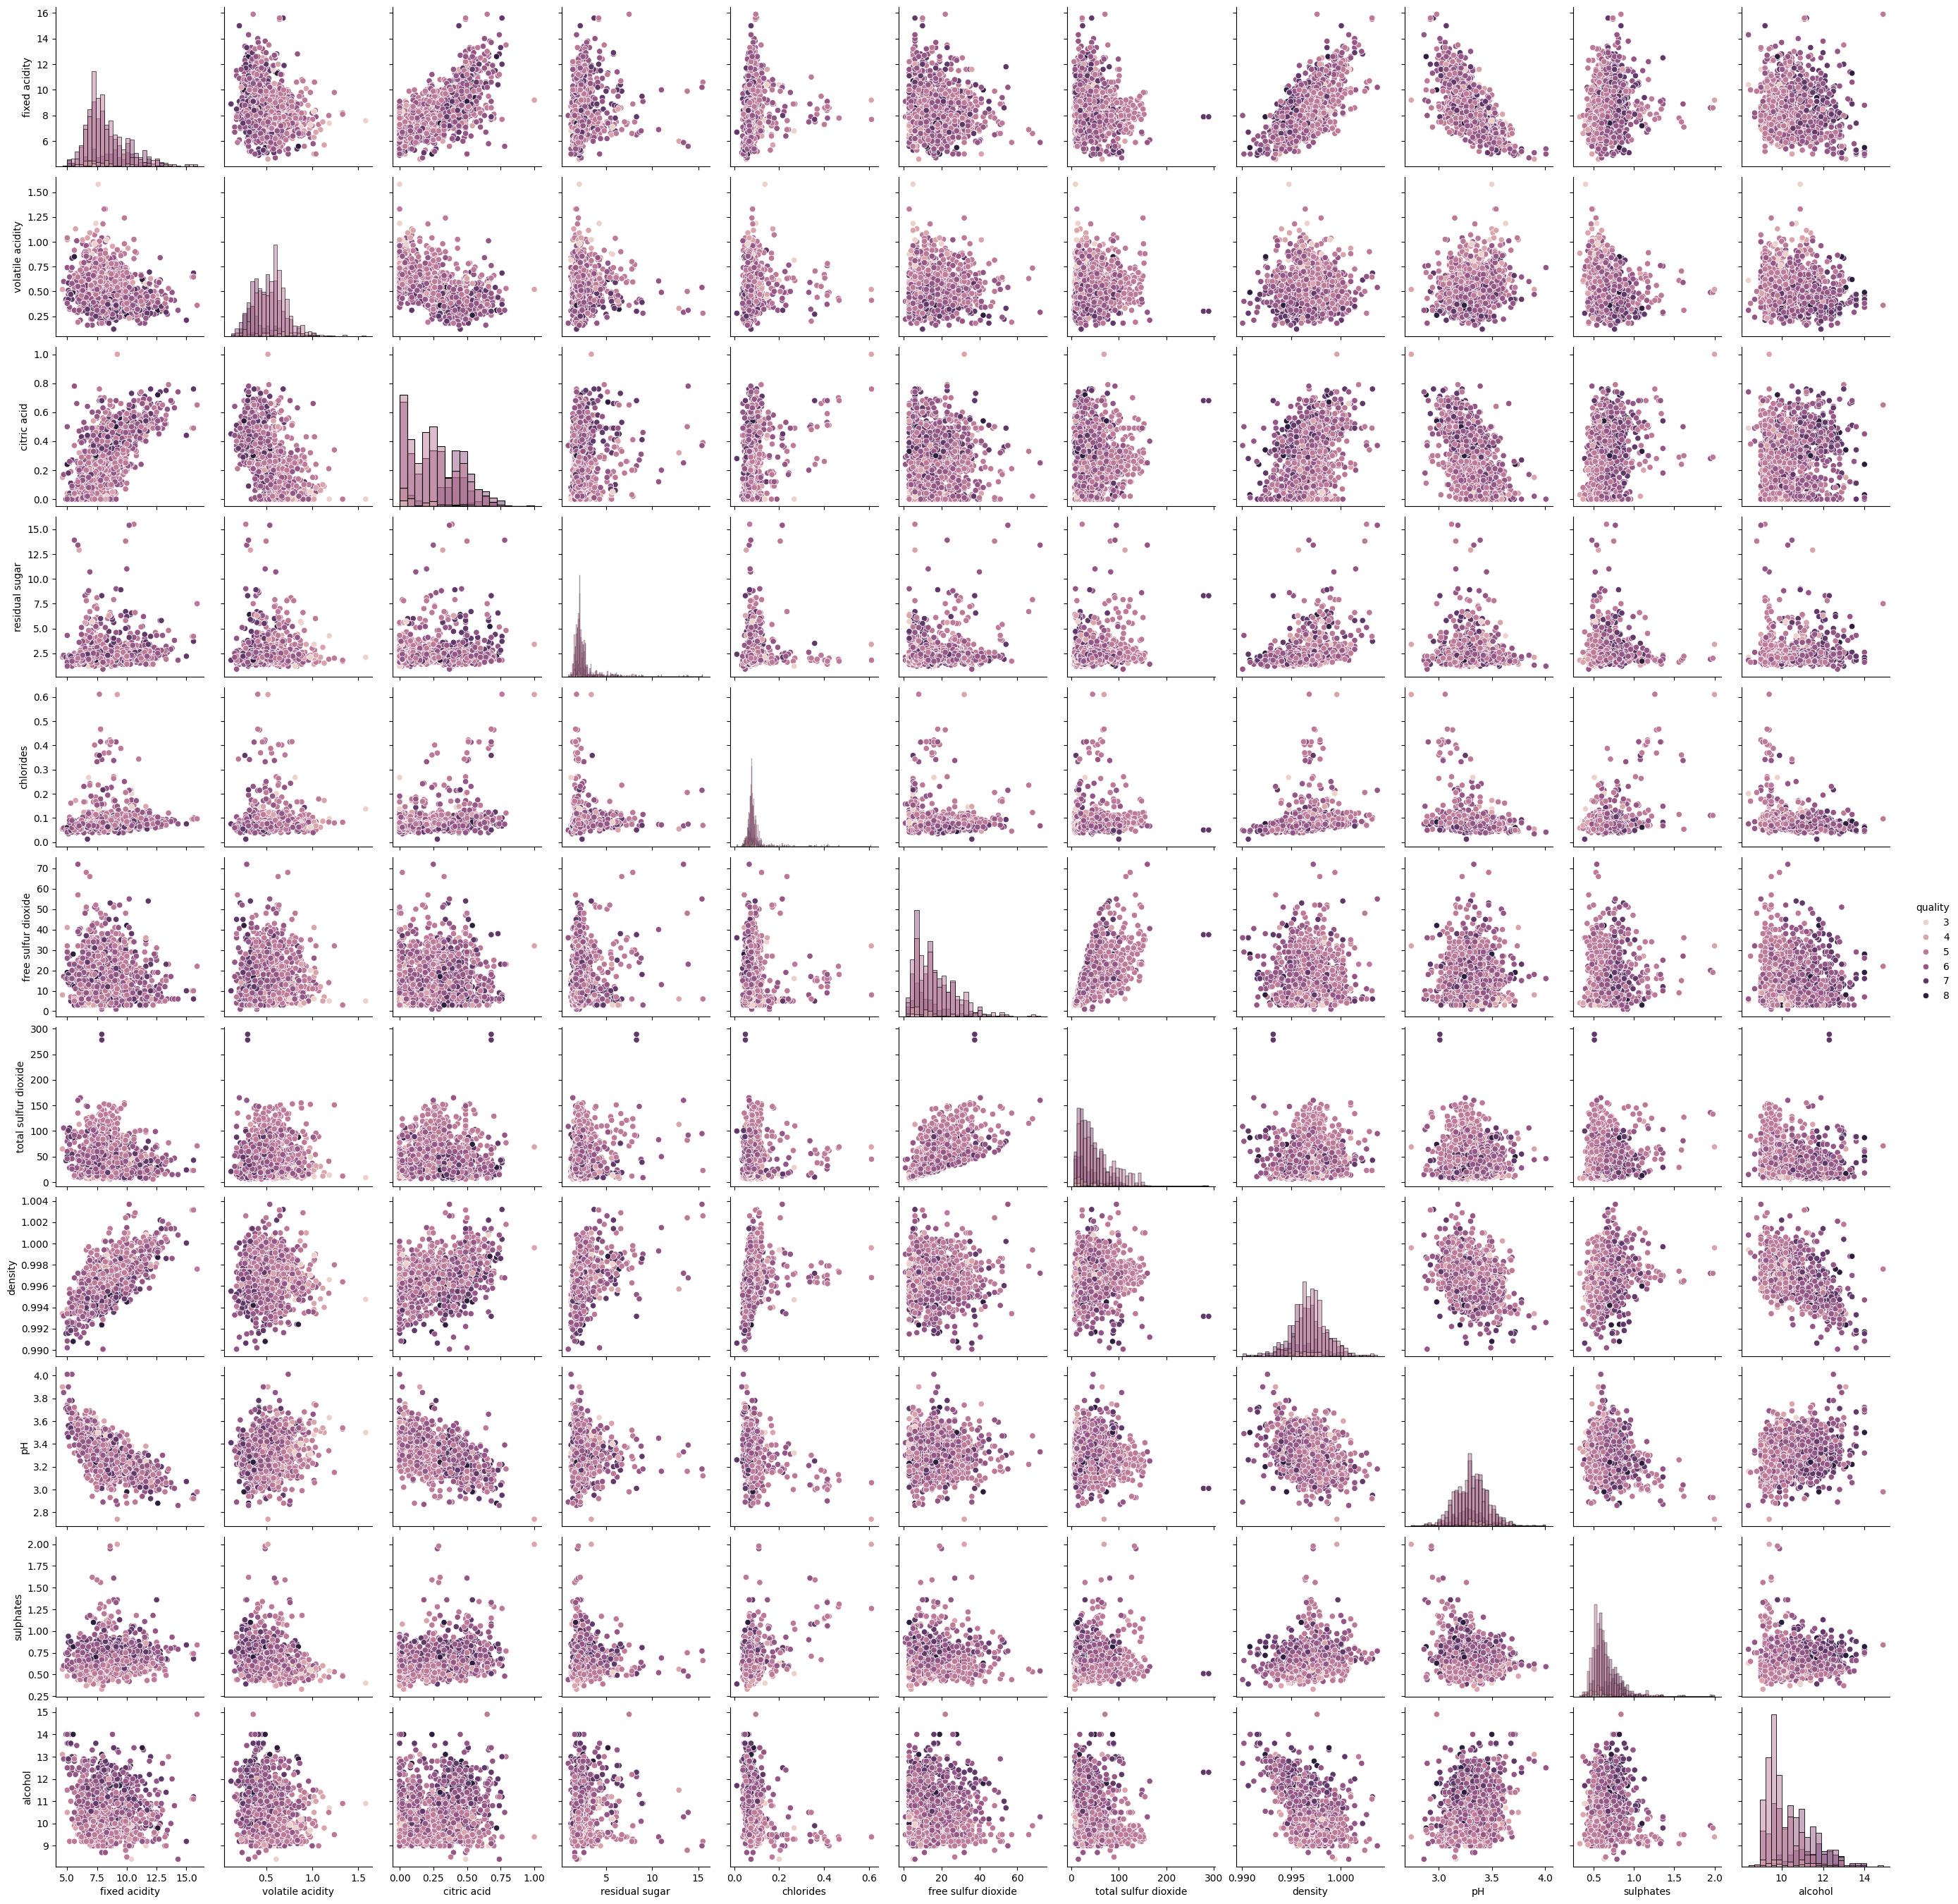

In [3]:
#Using seaborn to write a scatter plot between every column in the dataset.
#I chose quality as the hue value to more clearly see if certain values have an impact.

sns.pairplot(df, hue='quality', diag_kind = 'hist')

Step 3: Manipulation of data

In [4]:
#Copying the dataframe to manipulate the data without risking the original set.
datadupe = df.copy()
datadupe = datadupe.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
datadupe.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Convert data to standard units

In [18]:
#Quality does not need to be converted to standard units
datadupe['fixed acidity (standard units)'] = (datadupe['fixed acidity'] - np.mean(datadupe['fixed acidity']))/(np.std(datadupe['fixed acidity']))
datadupe['volatile acidity (standard units)'] = (datadupe['volatile acidity'] - np.mean(datadupe['volatile acidity']))/(np.std(datadupe['volatile acidity']))
datadupe['citric acid (standard units)'] = (datadupe['citric acid'] - np.mean(datadupe['citric acid']))/(np.std(datadupe['citric acid']))
datadupe['residual sugar (standard units)'] = (datadupe['residual sugar'] - np.mean(datadupe['residual sugar']))/(np.std(datadupe['residual sugar']))
datadupe['chlorides (standard units)'] = (datadupe['chlorides'] - np.mean(datadupe['chlorides']))/(np.std(datadupe['chlorides']))
datadupe['free sulfur dioxide (standard units)'] = (datadupe['free sulfur dioxide'] - np.mean(datadupe['free sulfur dioxide']))/(np.std(datadupe['free sulfur dioxide']))
datadupe['total sulfur dioxide (standard units)'] = (datadupe['total sulfur dioxide'] - np.mean(datadupe['total sulfur dioxide']))/(np.std(datadupe['total sulfur dioxide']))
datadupe['density (standard units)'] = (datadupe['density'] - np.mean(datadupe['density']))/(np.std(datadupe['density']))
datadupe['pH (standard units)'] = (datadupe['pH'] - np.mean(datadupe['pH']))/(np.std(datadupe['pH']))
datadupe['sulphates (standard units)'] = (datadupe['sulphates'] - np.mean(datadupe['sulphates']))/(np.std(datadupe['sulphates']))
datadupe['alcohol (standard units)'] = (datadupe['alcohol'] - np.mean(datadupe['alcohol']))/(np.std(datadupe['alcohol']))
datadupe.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  ...  \
0                 11.0                  34.0   0.9978  3.51       0.56  ...   
1                 25.0                  67.0   0.9968  3.20       0.68  ...   
2                 15.0                  54.0   0.9970  3.26       0.65  ...   
3                 17.0                  60.0   0.9980  3.16       0.58  ...   
4                 11.0                  34.0   0.9978  3.51       0.56  ...   

   volatile acidity (standard units)  citric acid (standard units)  \
0                           0.961877                     -1.391472   
1                           1.967442                     -1.391472   
2                           1.297065                     -1.186070   
3                          -1.384443                      1.484154   
4                           0.961877                     -1.391472   

   residual sugar (standard units)  chlorides (standard units)  \
0                        -0.453218                   -0.243707   
1                         0.043416                    0.223875   
2                        -0.169427                    0.096353   
3                        -0.453218                   -0.264960   
4                        -0.453218                   -0.243707   

   free sulfur dioxide (standard units)  \
0                             -0.466193   
1                              0.872638   
2                             -0.083669   
3                              0.107592   
4                             -0.466193   

   total sulfur dioxide (standard units)  density (standard units)  \
0                              -0.379133                  0.558274   
1                               0.624363                  0.028261   
2                               0.229047                  0.134264   
3                               0.411500                  0.664277   
4                              -0.379133                  0.558274   

   pH (standard units)  sulphates (standard units)  alcohol (standard units)  
0             1.288643                   -0.579207                 -0.960246  
1            -0.719933                    0.128950                 -0.584777  
2            -0.331177                   -0.048089                 -0.584777  
3            -0.979104                   -0.461180                 -0.584777  
4             1.288643                   -0.579207                 -0.960246  

[5 rows x 23 columns]

Step 4: Training set

In [17]:
#To begin the creation of the training set, we will shuffle without replacement the data, picking the first 66.66% of the rows
#in the training set with the rest going to the test set.
random = datadupe.sample(1000, replace = False)
training_set = random.iloc[0:667, :]
test_set = random.iloc[667:, :]

print(len(training_set))
print(len(test_set))

667
333


In [56]:
#assigning values to the features and response variable in the training set.
x_train = training_set.iloc[:, 11:24].values # extracting from collumns 11-23 (quality - alcohol (standard units))
y_train = training_set.iloc[:, 9].values
y_train = np.reshape(y_train, (len(y_train), 1))

x_test = test_set.iloc[:, 11:24].values # extracting from collumns 11-23 (quality - alcohol (standard units))
y_test = test_set.iloc[:, 9].values
y_test = np.reshape(y_test, (len(y_test), 1))

print("x_train_Shape:", np.shape(x_train))
print("y_train_Shape:", np.shape(y_train))

print("x_test_Shape:", np.shape(x_test))
print("y_test_Shape:", np.shape(y_test))

x_train_Shape: (667, 12)
y_train_Shape: (667, 1)
x_test_Shape: (333, 12)
y_test_Shape: (333, 1)


In [24]:
#To apply vectorization, transposing a row of ones to x_train and x_test
x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
print("x_train_Aug:", np.shape(x_train_Aug))
print(x_train_Aug)
#this may be set up improperly

x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
print("x_test_Aug:", np.shape(x_test_Aug))

x_train_Aug: (13, 667)
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 6.          6.          5.         ...  7.          5.
   6.        ]
 [ 0.27598301 -0.47090657  0.9079665  ...  0.9079665  -0.70071875
  -0.35600048]
 ...
 [-1.0438972   0.3167512  -0.65514052 ... -0.33117661 -0.26638383
  -0.46076217]
 [ 0.18796348 -0.22512806 -0.93328498 ...  0.95513348 -0.10710191
   0.01092425]
 [ 0.72936437  0.35389538 -0.86637886 ...  0.16616088 -1.05411336
  -0.77251161]]
x_test_Aug: (13, 333)


In [34]:
#define theta as an array of zeroes.
theta = np.zeros((x_train_Aug.shape[0], 1))

print("theta:", np.shape(theta))
print("Shape of x_train_Aug:", np.shape(x_train_Aug))

theta: (13, 1)
Shape of x_train_Aug: (13, 667)


In [49]:
#Gradient descent algorithm
no_of_iter = np.arange(1, 200001)
alpha = 0.003
m_train = len(x_train)
m_test = len(x_test)

costfunc = []
#iteration loop
for i in no_of_iter:
    Z = np.transpose(theta)@x_train_Aug
    p = 1/(1+np.exp(-Z))
    ft = ((np.log10(1/(1+np.exp(-Z))))@y_train)[0,0]  
    st = ((np.log10(1-(1/(1+np.exp(-Z)))))@(1-y_train))[0,0]
    cf = (1/m_train)*(-ft-st) #Cost function
    costfunc.append(cf)
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(p)-y_train)) #Derivative of cost function
    theta = theta - (alpha*delthetaj) #Updating theta values
    
print(len(costfunc))
print(theta)

200000
[[ 3.0134423 ]
 [-0.30899141]
 [-0.26040811]
 [ 0.11682941]
 [-0.01638847]
 [-0.03928172]
 [ 0.62078105]
 [-0.14368421]
 [ 0.11481535]
 [-0.30356437]
 [-0.36348711]
 [ 2.28408905]
 [-0.13946778]]


In [50]:
#Testing the model on the training set

y_train_pred = np.zeros((m_train,1))
h_Theta = np.transpose(theta)@x_train_Aug
h_Theta_trans = np.transpose(h_Theta)


#Comparing predicted and actual results

for j in range(m_train):
    if (1 / (1 + np.exp(-h_Theta_trans[j]))) >= 0.5:
        y_train_pred[j] = 1
    else:
        y_train_pred[j] = 0
print(y_train_pred)

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.

In [42]:
y_test_pred = np.zeros((m_test,1))
h_Theta = np.transpose(theta)@x_test_Aug
h_Theta_trans = np.transpose(h_Theta)


#Comparing predicted and actual results

for j in range(m_test):
    if (1 / (1 + np.exp(-h_Theta_trans[j]))) >= 0.5:
        y_test_pred[j] = 1
    else:
        y_test_pred[j] = 0
print(y_test_pred)

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.

Text(0.5, 1.0, 'Cost function vs. number of iterations')

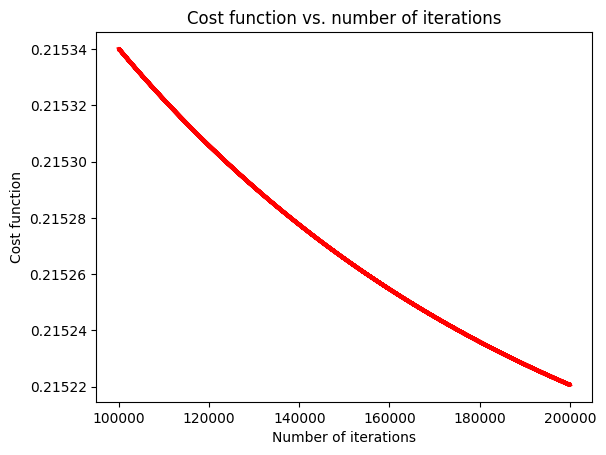

In [47]:
#Plotting cost function vs. number of iterations

plt.plot(no_of_iter[100000:199999],costfunc[100000:199999],color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Cost function vs. number of iterations")

In [62]:
#Model evaluation on the test set
#True positive
count_TP=0

for TP in range(m_test):
    
    if (y_test_pred[TP] == 1) & (y_test[TP] == 1):
        count_TP = count_TP + 1
    print("True_Positives:",count_TP)
#False positive
count_FP=0
for FP in range(m_test):
    if (y_test_pred[FP] == 1) & (y_test_pred[FP] == 0): 
        count_FP = count_FP+1
    print("False Positives:",count_FP)
#True negative
count_TN=0
for TN in range(m_test):
    if (y_test_pred[TN] == 0) & (y_test[TN] == 0): 
        count_TN = count_TN+1
    print("True Negatives:",count_TN)
#False negative
count_FN=0
for FN in range(m_test):
    if (y_test_pred[FN] == 0) & (y_test[FN] == 1): 
        count_FN = count_FN+1
    print("False Negatives:",count_FN)
    
Accuracy = (count_TP+count_TN)/m_test

print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)

print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)

print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[0.] [0.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Positives: 0
[1.] [1.]
True_Posit

ZeroDivisionError: division by zero

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert wine quality to binary classification (good or not good)
threshold = 7  # Define the threshold for wine quality

y_test_binary = [1 if val >= threshold else 0 for val in y_test]
y_test_pred_binary = [1 if val >= 0.5 else 0 for val in y_test_pred]

# Calculate evaluation metrics using scikit-learn functions and handle zero division warning
Accuracy = accuracy_score(y_test_binary, y_test_pred_binary)
Precision = precision_score(y_test_binary, y_test_pred_binary)
Recall = recall_score(y_test_binary, y_test_pred_binary, zero_division=0)  # Set zero_division parameter
F1_Score = f1_score(y_test_binary, y_test_pred_binary)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Accuracy: 0.2852852852852853
Precision: 0.0
Recall: 0.0
F1_Score: 0.0


In [44]:
from sklearn.metrics import classification_report

# Calculate evaluation metrics using classification report
report = classification_report(y_test_binary, y_test_pred_binary, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.29      0.44       333
           1       0.00      0.00      0.00         0

    accuracy                           0.29       333
   macro avg       0.50      0.14      0.22       333
weighted avg       1.00      0.29      0.44       333

